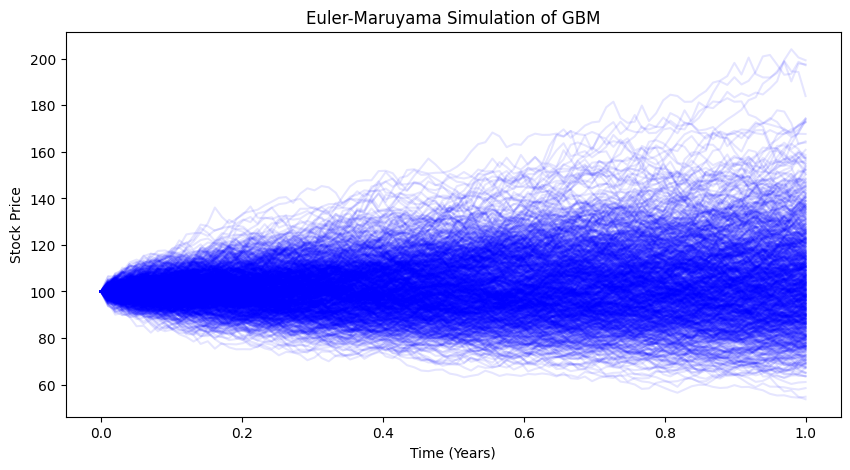

In [1]:
import numpy as np
import matplotlib.pyplot as plt

"""
This script simulates stock price movements using the Euler-Maruyama method,
a numerical approach to solving stochastic differential equations. It models
Geometric Brownian Motion (GBM) to approximate stock price paths over time.
"""

def euler_maruyama(S0, mu, sigma, T, dt, n_paths):
    """
    Simulate stochastic differential equations using the Euler-Maruyama method.
    :param S0: Initial stock price
    :param mu: Drift (expected return)
    :param sigma: Volatility
    :param T: Time horizon (years)
    :param dt: Time step
    :param n_paths: Number of simulation paths
    :return: Simulated stock price paths
    """
    N = int(T / dt)  # Number of time steps
    t = np.linspace(0, T, N)
    S = np.zeros((n_paths, N))
    S[:, 0] = S0
    
    for i in range(1, N):
        dW = np.random.normal(scale=np.sqrt(dt), size=n_paths)  # Brownian motion increment
        S[:, i] = S[:, i - 1] + mu * S[:, i - 1] * dt + sigma * S[:, i - 1] * dW
    
    return t, S

# Parameters
S0 = 100    # Initial stock price
mu = 0.05   # Expected return (drift)
sigma = 0.2 # Volatility
T = 1       # Time horizon in years
dt = 0.01   # Time step
n_paths = 1000 # Number of simulations

# Run simulation
t, S = euler_maruyama(S0, mu, sigma, T, dt, n_paths)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(t, S.T, alpha=0.1, color='blue')
plt.title('Euler-Maruyama Simulation of GBM')
plt.xlabel('Time (Years)')
plt.ylabel('Stock Price')
plt.show()
